In [34]:
import utils as ut
import pandas as pd
import numpy as np


In [35]:

#Generate a data for Products
product_A = ut.generate_random_sales(50,100,365)
product_B = ut.generate_random_sales(30,80,365)
product_C = ut.generate_random_sales(20,60,365)
product_D = ut.generate_random_sales(10,50,365)


In [36]:

# Create the DataFrame with columns : Date,PRoduct_A,PRoduct_B,PRoduct_C,PRoduct_D
year = 2024
dates = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-30")
product_sales_Df = pd.DataFrame({
    'Date':dates,
    'Product_A':product_A,
    'Product_B':product_B,
    'Product_C':product_C,
    'Product_D':product_D,
})

In [37]:
#Generate initial.csv
product_sales_Df.to_csv('./data/initial.csv',index=False)

In [38]:
product_sales_Df["Date"] = pd.to_datetime(product_sales_Df["Date"])
product_sales_Df['month_num'] = product_sales_Df['Date'].dt.month
product_sales_Df['month_name'] = product_sales_Df['Date'].dt.month_name()


In [39]:
sum_per_month = product_sales_Df.groupby(["month_num", "month_name"]).sum(numeric_only=True).sort_values("month_num")


<h1>Build DataFrame</h1>

In [40]:
# Create the dataframe
df = pd.DataFrame({
    'Month':product_sales_Df['month_name'].unique(),
    'Product_A':sum_per_month['Product_A'].tolist(),
    'Product_B':sum_per_month['Product_B'].tolist(),
    'Product_C':sum_per_month['Product_C'].tolist(),
    'Product_D':sum_per_month['Product_D'].tolist(),
})
df


,Month,Product_A,Product_B,Product_C,Product_D
0,January,2370,1748,1166,952
1,February,2289,1497,1193,850
2,March,2282,1616,1263,892
3,April,2166,1576,1239,884
4,May,2265,1685,1126,1013
5,June,2308,1513,1205,888
6,July,2319,1648,1159,907
7,August,2215,1565,1230,981
8,September,2255,1666,1241,958
9,October,2371,1832,1325,998


In [41]:
# Monthly Metrics
Total_Sales = df.sum(axis=1,numeric_only=True)
Average_Sales = df.mean(axis=1,numeric_only=True)
Month_over_Month_Growth = Total_Sales.pct_change() *100


In [42]:
cols_name = df.select_dtypes(include='number').columns
df['Max_Sales_Product']=df[cols_name].idxmax(axis=1)
df['Min_Sales_Product']=df[cols_name].idxmin(axis=1)



In [43]:
df['Quarter'] = pd.cut(
    df.index+1,
    bins=[0, 3, 6, 9,12],
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)

In [46]:
df.to_csv('./data/final.csv')

<h1>Pivot Tables & Summaries</h1>

In [47]:
average_per_quarter_for_products = pd.pivot_table(
    data=df,
    values=['Product_A','Product_B','Product_C','Product_D'],
    index='Quarter',
    aggfunc='mean'
)

/tmp/ipykernel_13133/1794977830.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  average_per_quarter_for_products = pd.pivot_table(


In [48]:
total_sales_per_quarter_for_products  = pd.pivot_table(
    data=df,
    values=['Product_A','Product_B','Product_C','Product_D'],
    index='Quarter',
    aggfunc='sum'
)

/tmp/ipykernel_13133/1653757453.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  total_sales_per_quarter_for_products  = pd.pivot_table(


In [49]:
total_sales_per_quarter_for_products['Total_Sales']=total_sales_per_quarter_for_products.sum(axis=1)

In [50]:
with open("./data/output.csv", "w") as f:
    f.write(" average sales per quarter for each product   \n")
    average_per_quarter_for_products.to_csv(f)
    f.write("\n\n")

    f.write("=== total sales per quarter for each product and Total sales for each quarter  \n")
    total_sales_per_quarter_for_products.to_csv(f)


<h1>Key Insights</h1>

In [51]:
best_month = np.argmax(Total_Sales)+1
best_product =total_sales_per_quarter_for_products.columns[np.argmax( total_sales_per_quarter_for_products.iloc[:, :-1].sum(axis=0))]
best_quarter = total_sales_per_quarter_for_products.index[np.argmax(total_sales_per_quarter_for_products['Total_Sales'])]

<h1>Visualizations</h1>

In [52]:
import matplotlib.pyplot as plt

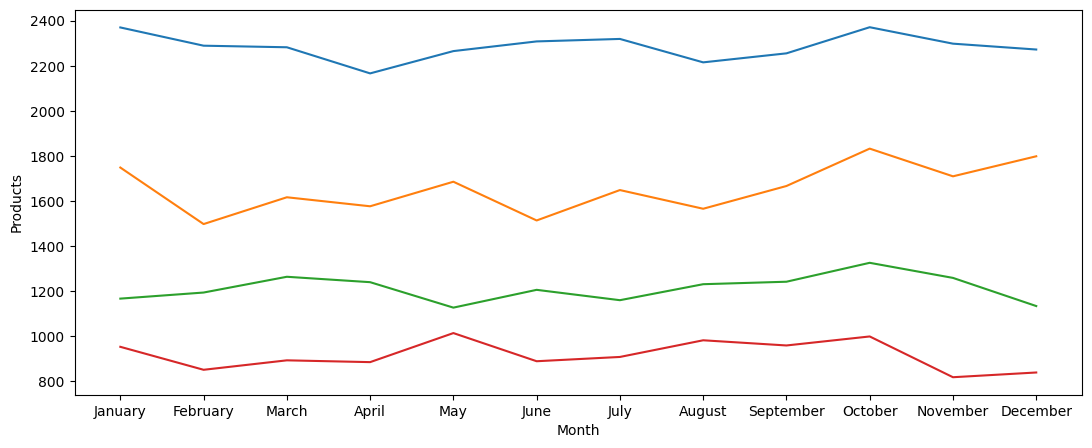

In [53]:
plt.figure(figsize=(13,5))
plt.plot(df['Month'],df.loc[:,'Product_A':'Product_D'])
plt.xlabel('Month')
plt.ylabel('Products')
plt.show()

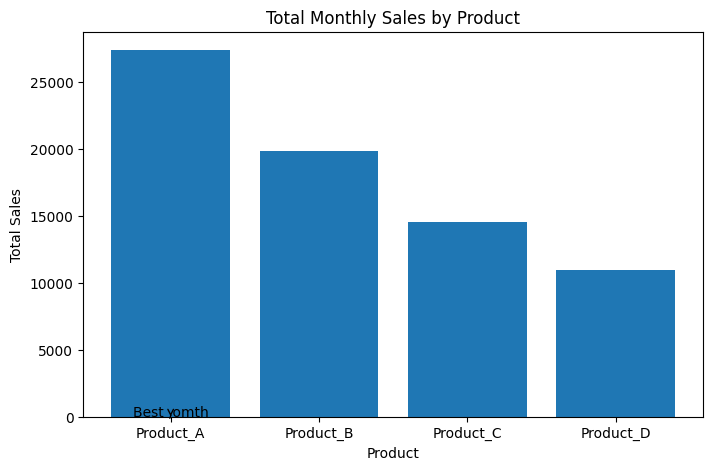

In [54]:

# Sum per month for each product
monthly_totals = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum()

plt.figure(figsize=(8, 5))

plt.bar(['Product_A', 'Product_B', 'Product_C', 'Product_D'],monthly_totals)
plt.title("Total Monthly Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.annotate(
    "Best ,omth",
    xy=(best_product, best_month),
    xytext=(best_product, best_month),
    ha='center',
    arrowprops=dict(facecolor='red', arrowstyle='->')
)
plt.show()



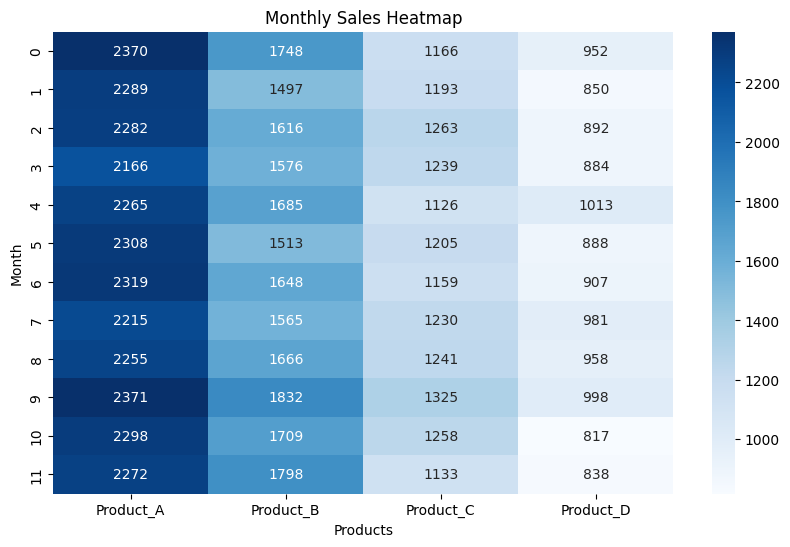

In [55]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(
    df.loc[:,'Product_A':'Product_D'],
    annot=True,
    fmt=".0f",
    cmap="Blues"
)

plt.title("Monthly Sales Heatmap")
plt.xlabel("Products")
plt.ylabel("Month")
plt.show()




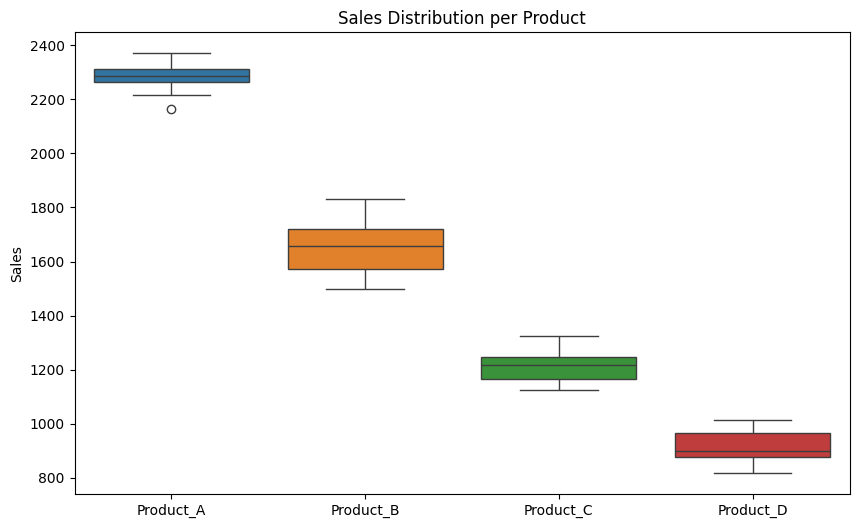

In [56]:

plt.figure(figsize=(10, 6))
sns.boxplot(data =   df.loc[:,'Product_A':'Product_D'])
plt.title("Sales Distribution per Product")
plt.ylabel("Sales")
plt.show()